In [67]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np
import pandas as pd
from __future__ import division
from math import sqrt
import os
import glob
import csv
import statistics
from sklearn import metrics
from pandas import DataFrame
import seaborn as sns

In [68]:
csv_input = pd.read_csv("consolidated_list.csv")
csv_input

,ID,TruncatedID,Mean,SD,AUC,Peak,MaxIndex,Halfpk,Skew,HHMean,Fat,Carb,Protein
0,2133-002_PB1,2133-002,92.432432,11.832160,998100.0,114,17,185,0.014158,88.857143,20.0,51,18
1,2133-022_PB1,2133-022,107.000000,21.071308,905850.0,143,14,145,0.392537,91.000000,20.0,51,18
2,2133-020_PB1,2133-020,98.297297,8.831761,1061850.0,112,4,185,-0.573170,96.000000,20.0,51,18
3,2133-004_Bar2,2133-004,125.648649,21.679483,1362150.0,164,20,185,0.525197,101.142857,18.0,48,9
4,2133-010_CF2,2133-010,78.062500,9.643651,724950.0,99,16,160,0.652308,75.428571,2.5,54,11
5,2133-010_CF1,2133-010,104.000000,16.000000,1126050.0,143,18,185,1.285932,98.285714,2.5,54,11
6,2133-020_CF1,2133-020,110.135135,33.496268,1198050.0,172,17,150,0.680333,72.142857,2.5,54,11
7,2133-022_PB2,2133-022,99.702703,27.820855,1081200.0,152,15,135,0.735183,71.571429,20.0,51,18
8,2133-015_CF2,2133-015,147.864865,25.258662,1605900.0,190,12,185,0.128753,119.142857,2.5,54,11
9,2133-022_Bar1,2133-022,115.540541,24.248711,1253700.0,168,16,185,1.152250,97.857143,18.0,48,9


In [69]:
TruncatedID = csv_input['TruncatedID']
ID = csv_input['ID']
Fat = csv_input['Fat']
Carb =csv_input['Carb']
Protein = csv_input['Protein']
del csv_input['TruncatedID']
del csv_input['ID']
del csv_input['Protein']
del csv_input['Fat']
del csv_input['Carb']

In [70]:
normalizedvalues = []
for column in csv_input:
    max_x = max(csv_input[column])
    min_x = min(csv_input[column])
    normalizedfeatures = []
    for element in csv_input[column]:
        norm = (element - min_x) / (max_x-min_x)
        normalizedfeatures.append(norm)
    normalizedvalues.append(normalizedfeatures)

In [71]:
normdf = DataFrame.from_records(normalizedvalues)
normdf = normdf.transpose()
normdf.columns = ["Mean", "SD", "AUC", "Peak", "MaxIndex", "Halfpk","Skew","HHMean"]

In [72]:
normdf.insert(loc=0, column='ID', value=ID)
normdf.insert(loc=1, column='TruncatedID', value=TruncatedID)
normdf.insert(loc=10, column='Fat', value=Fat)
normdf.insert(loc=11, column='Carb', value=Carb)
normdf.insert(loc=12, column='Protein', value=Protein)
normdf

,ID,TruncatedID,Mean,SD,AUC,Peak,MaxIndex,Halfpk,Skew,HHMean,Fat,Carb,Protein
0,2133-002_PB1,2133-002,0.247106,0.172582,0.370428,0.195876,0.472222,0.885714,0.471327,0.238614,20.0,51,18
1,2133-022_PB1,2133-022,0.351080,0.319784,0.320216,0.345361,0.388889,0.657143,0.550457,0.253465,20.0,51,18
2,2133-020_PB1,2133-020,0.288966,0.124779,0.405127,0.185567,0.111111,0.885714,0.348500,0.288119,20.0,51,18
3,2133-004_Bar2,2133-004,0.484182,0.329474,0.568583,0.453608,0.555556,0.885714,0.578200,0.323762,18.0,48,9
4,2133-010_CF2,2133-010,0.144543,0.137714,0.221750,0.118557,0.444444,0.742857,0.604782,0.145545,2.5,54,11
5,2133-010_CF1,2133-010,0.329668,0.238986,0.440072,0.345361,0.500000,0.885714,0.737291,0.303960,2.5,54,11
6,2133-020_CF1,2133-020,0.373457,0.517743,0.479262,0.494845,0.472222,0.685714,0.610643,0.122772,2.5,54,11
7,2133-022_PB2,2133-022,0.298997,0.427321,0.415660,0.391753,0.416667,0.600000,0.622114,0.118812,20.0,51,18
8,2133-015_CF2,2133-015,0.642747,0.386499,0.701257,0.587629,0.333333,0.885714,0.495292,0.448515,2.5,54,11
9,2133-022_Bar1,2133-022,0.412037,0.370408,0.509553,0.474227,0.444444,0.885714,0.709334,0.300990,18.0,48,9


In [33]:
normdf.to_csv("Normalized_Consolidated_List.csv", index=False)

In [73]:
del normdf['TruncatedID']
del normdf['ID']
corrdf = normdf.loc[:, 'Mean':'HHMean']

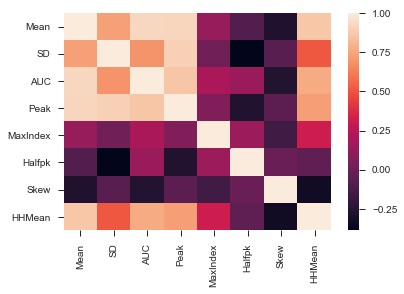

In [74]:
corr = corrdf.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

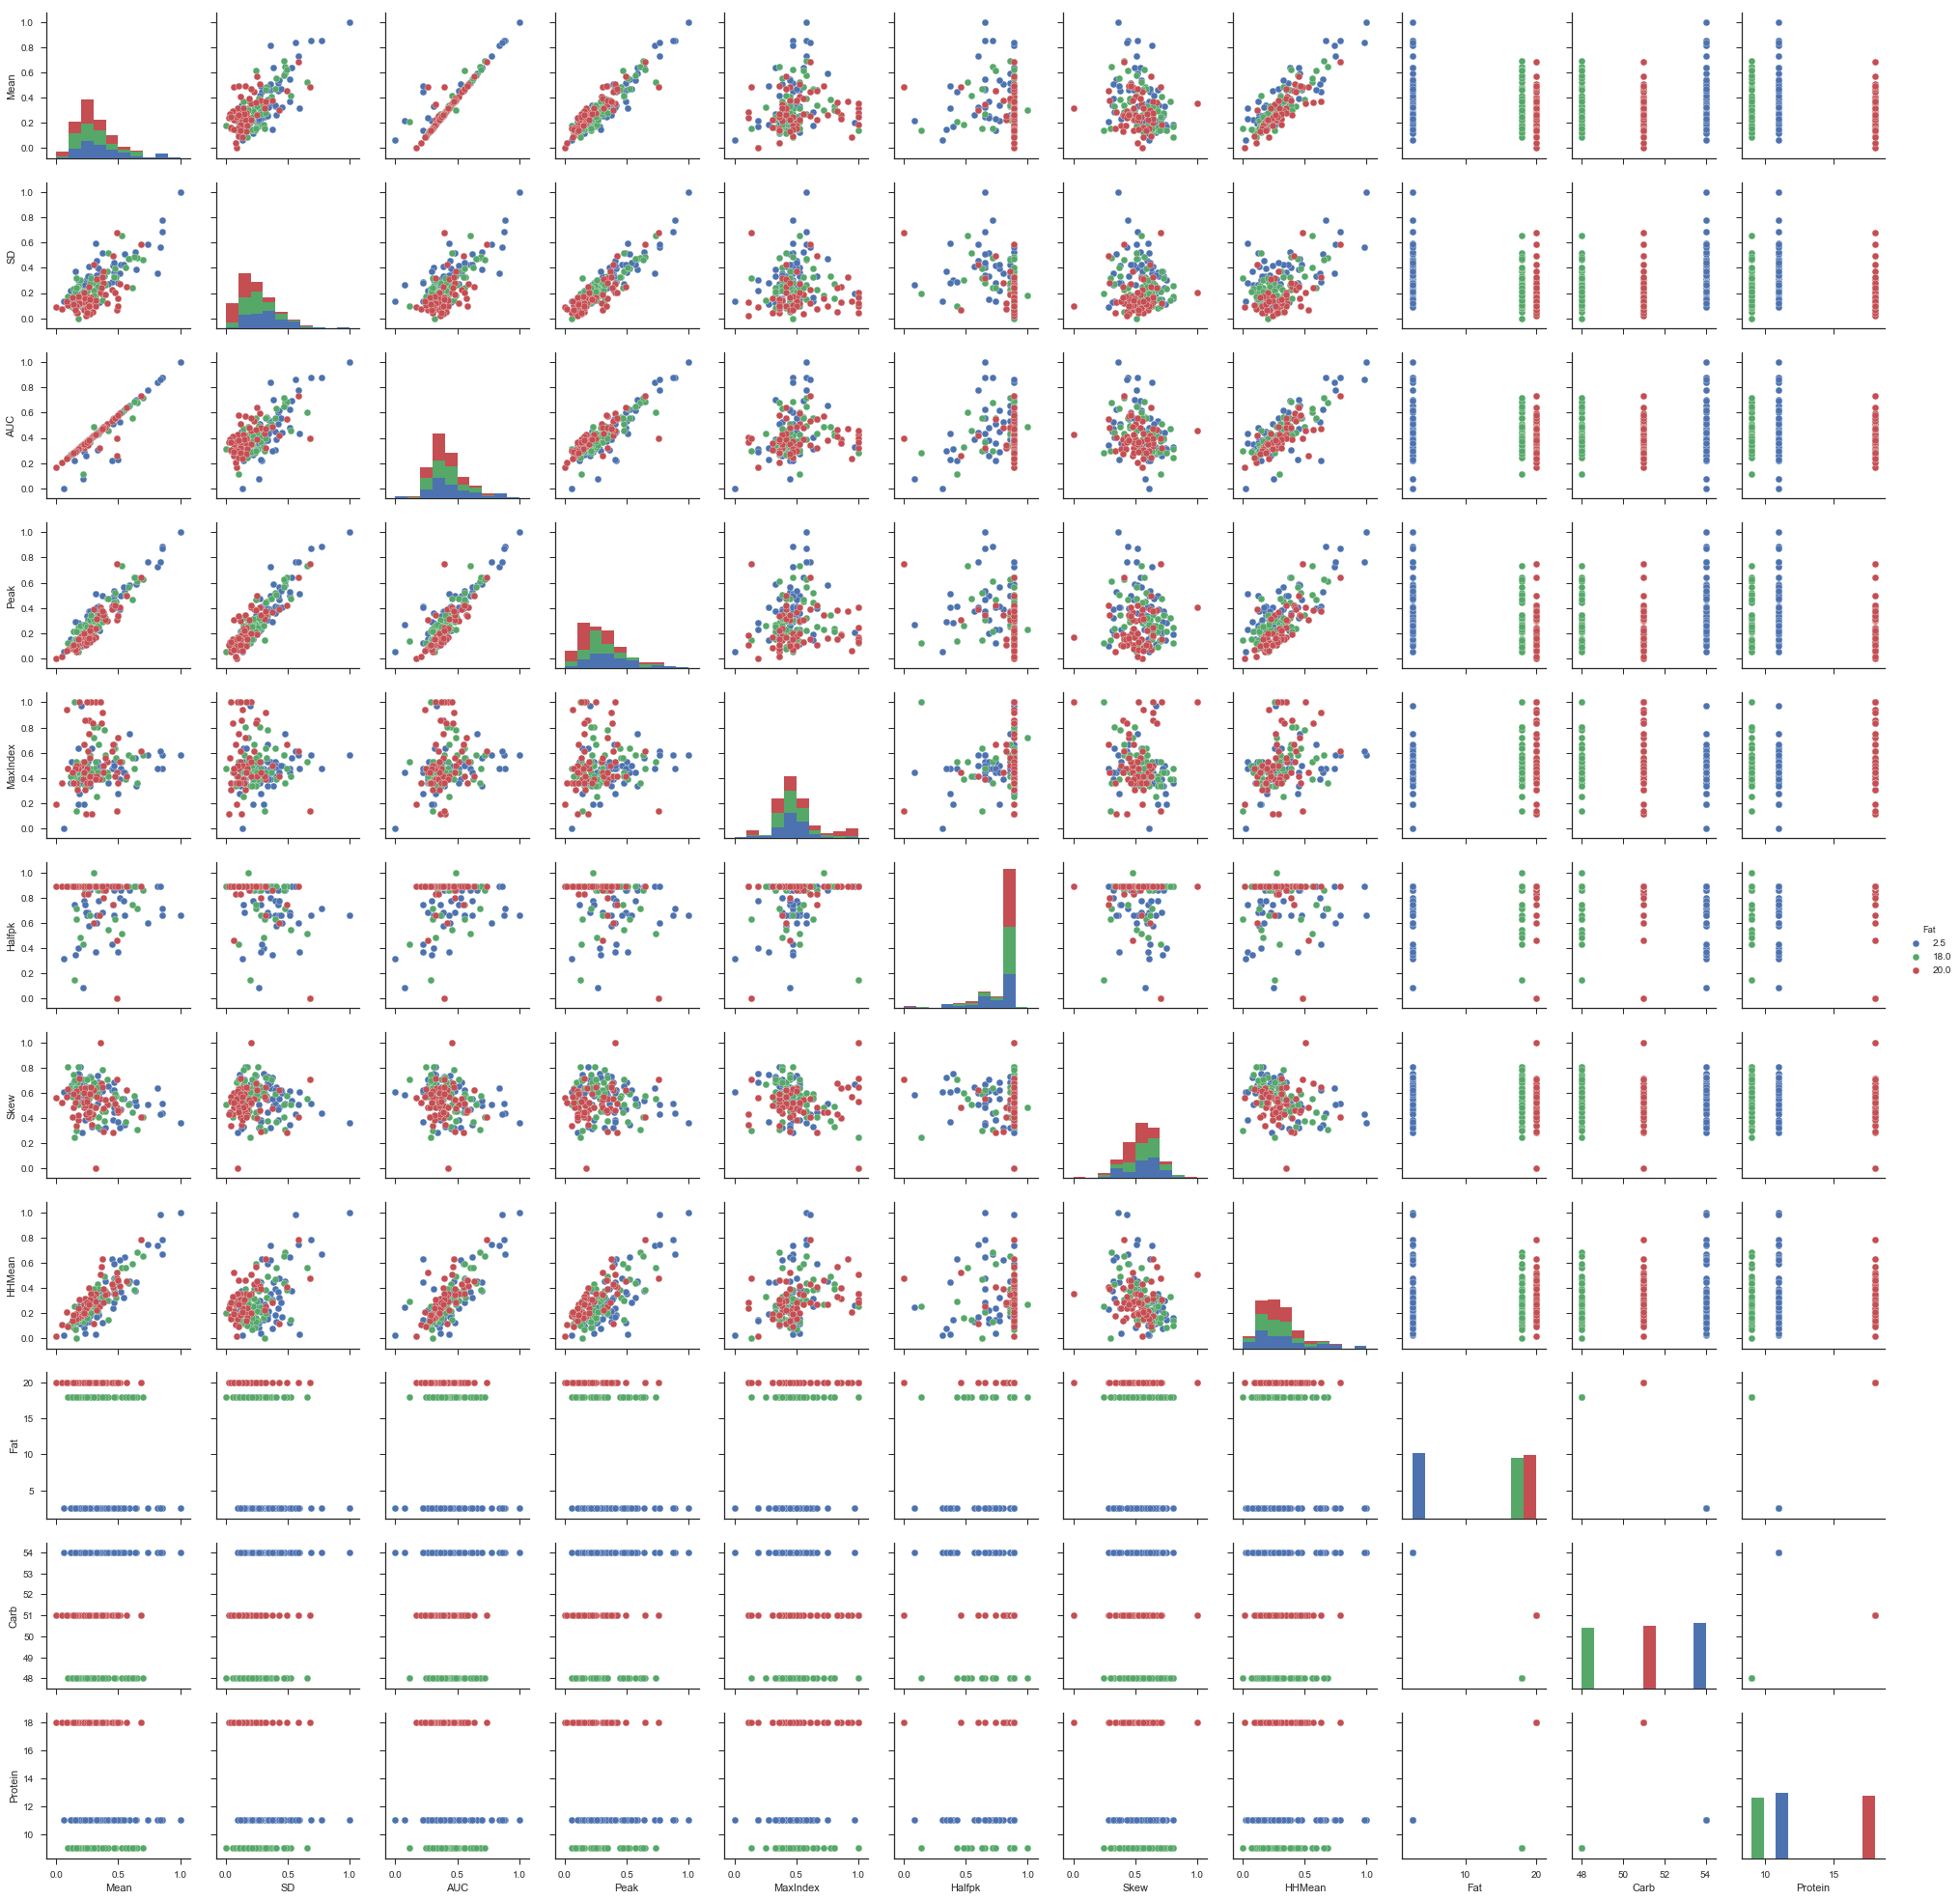

In [59]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(normdf,hue="Fat")

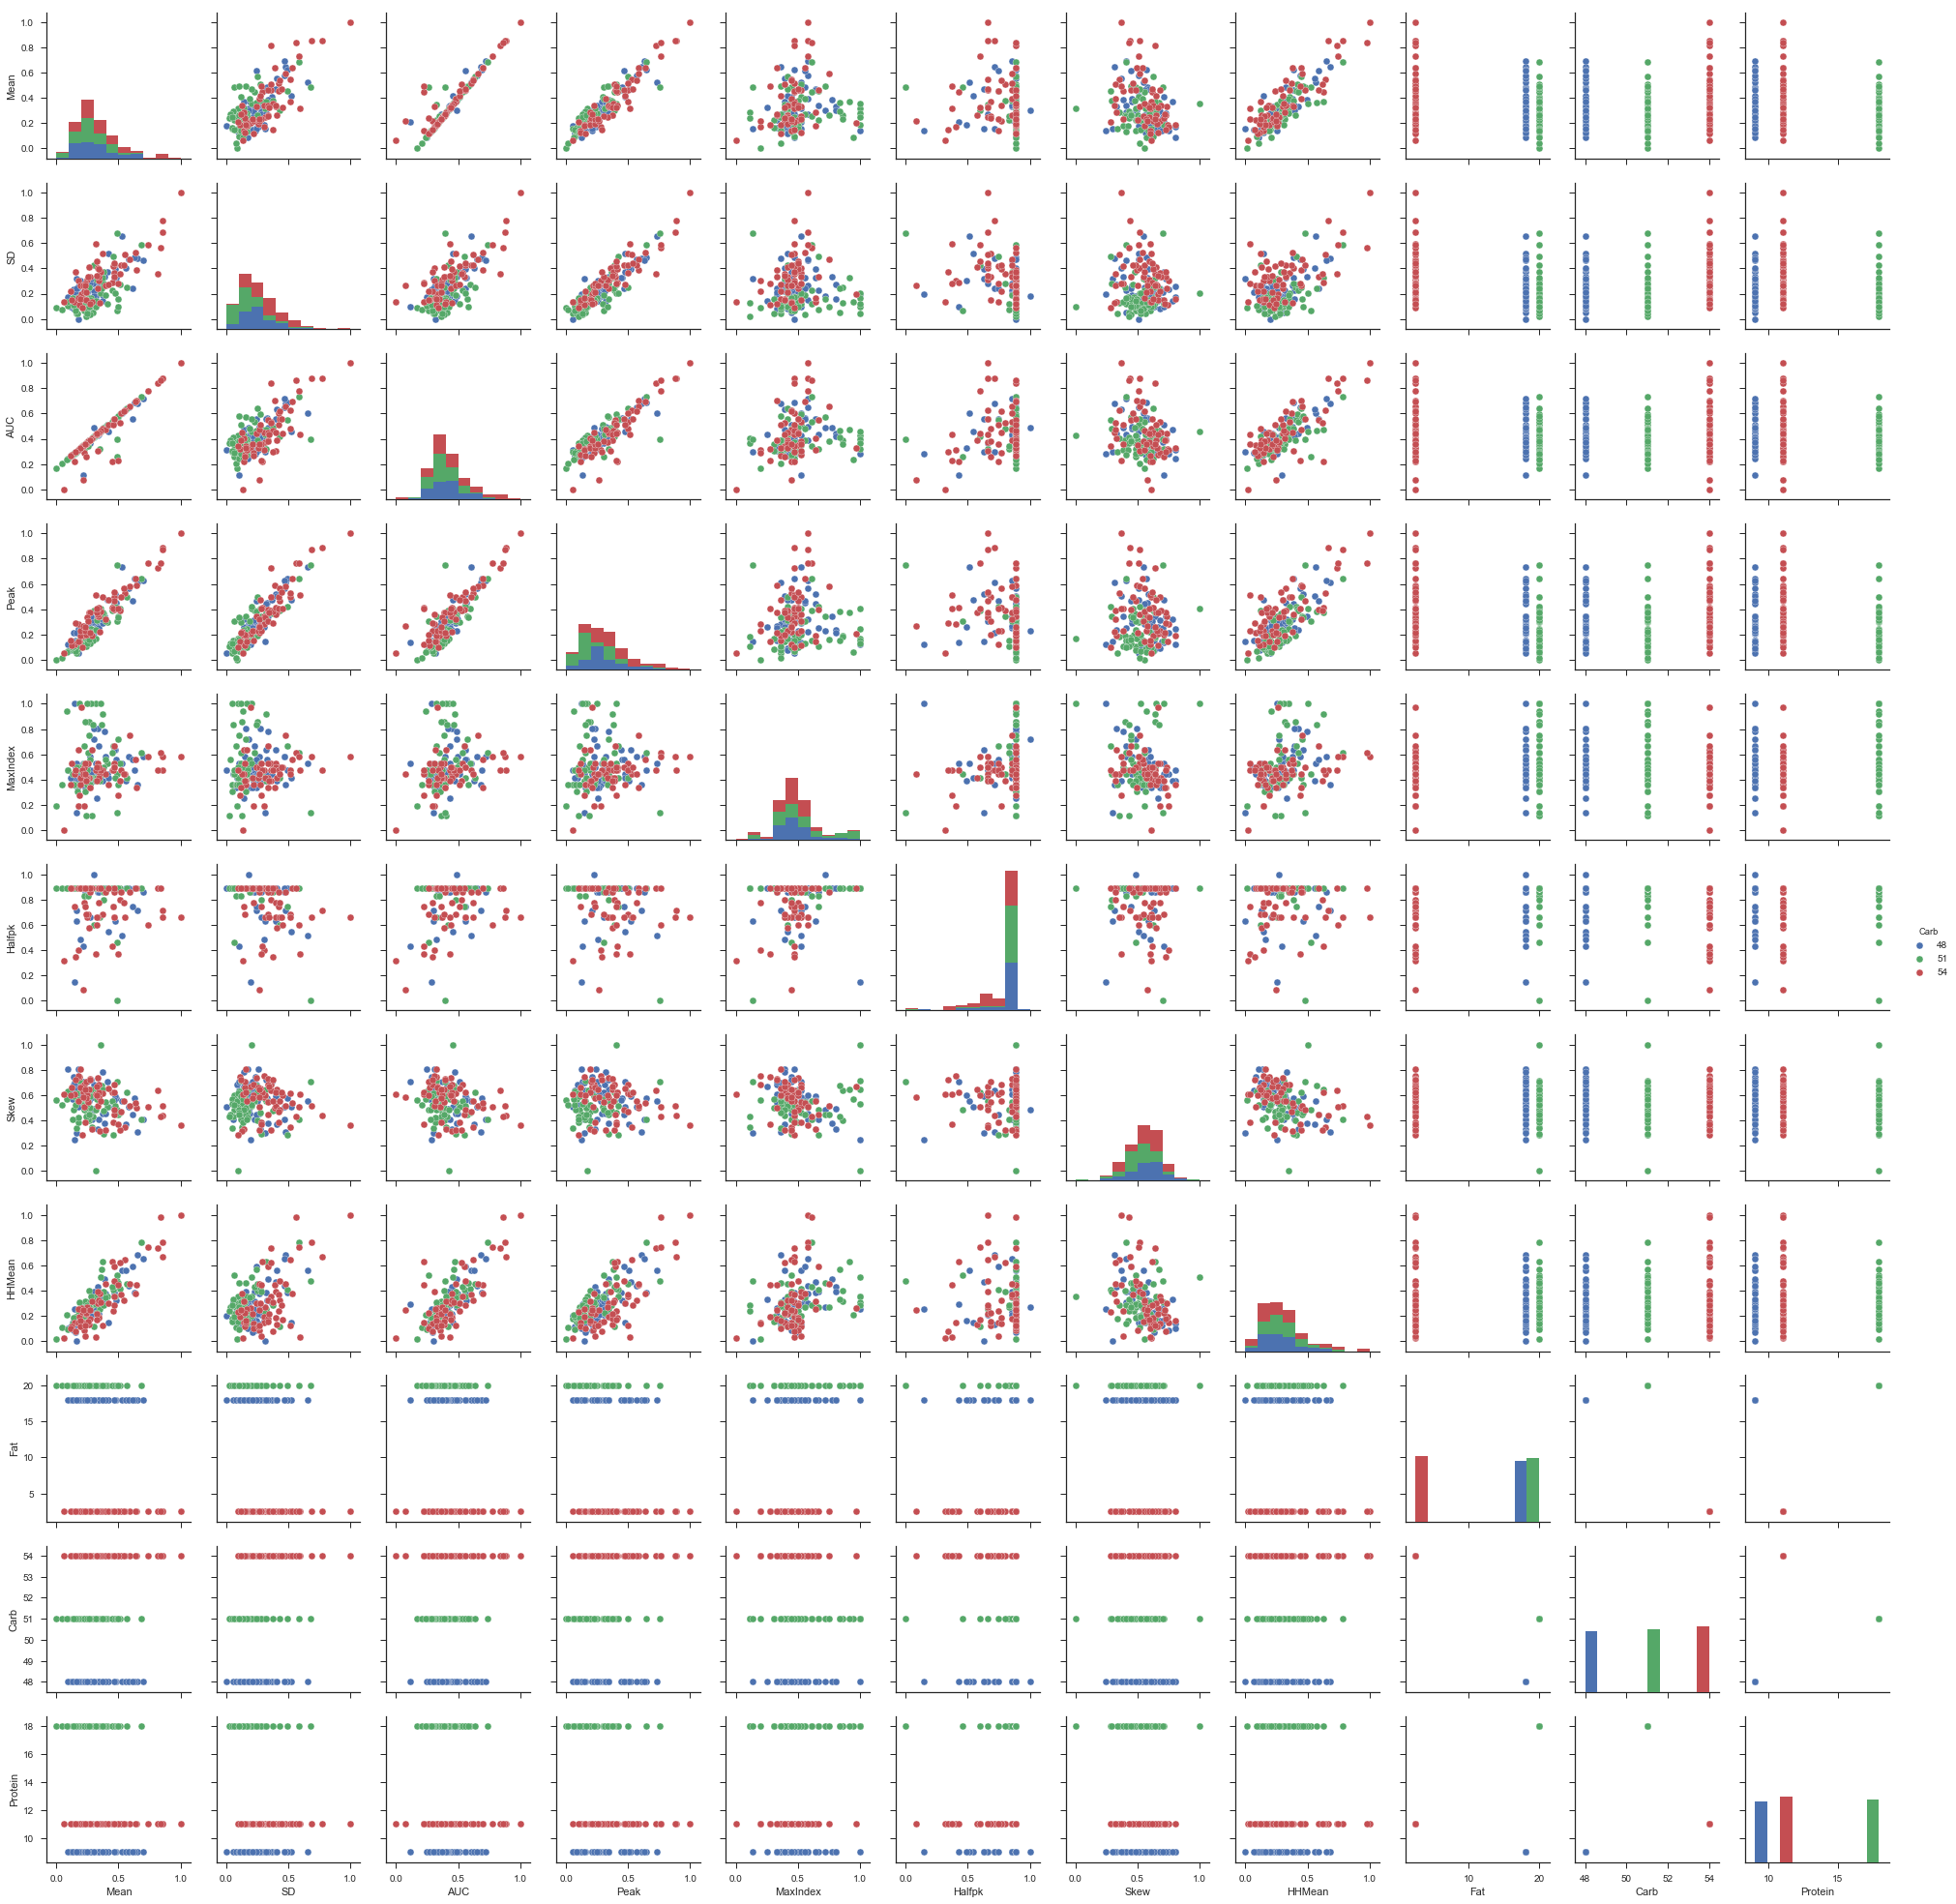

In [60]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(normdf,hue="Carb")

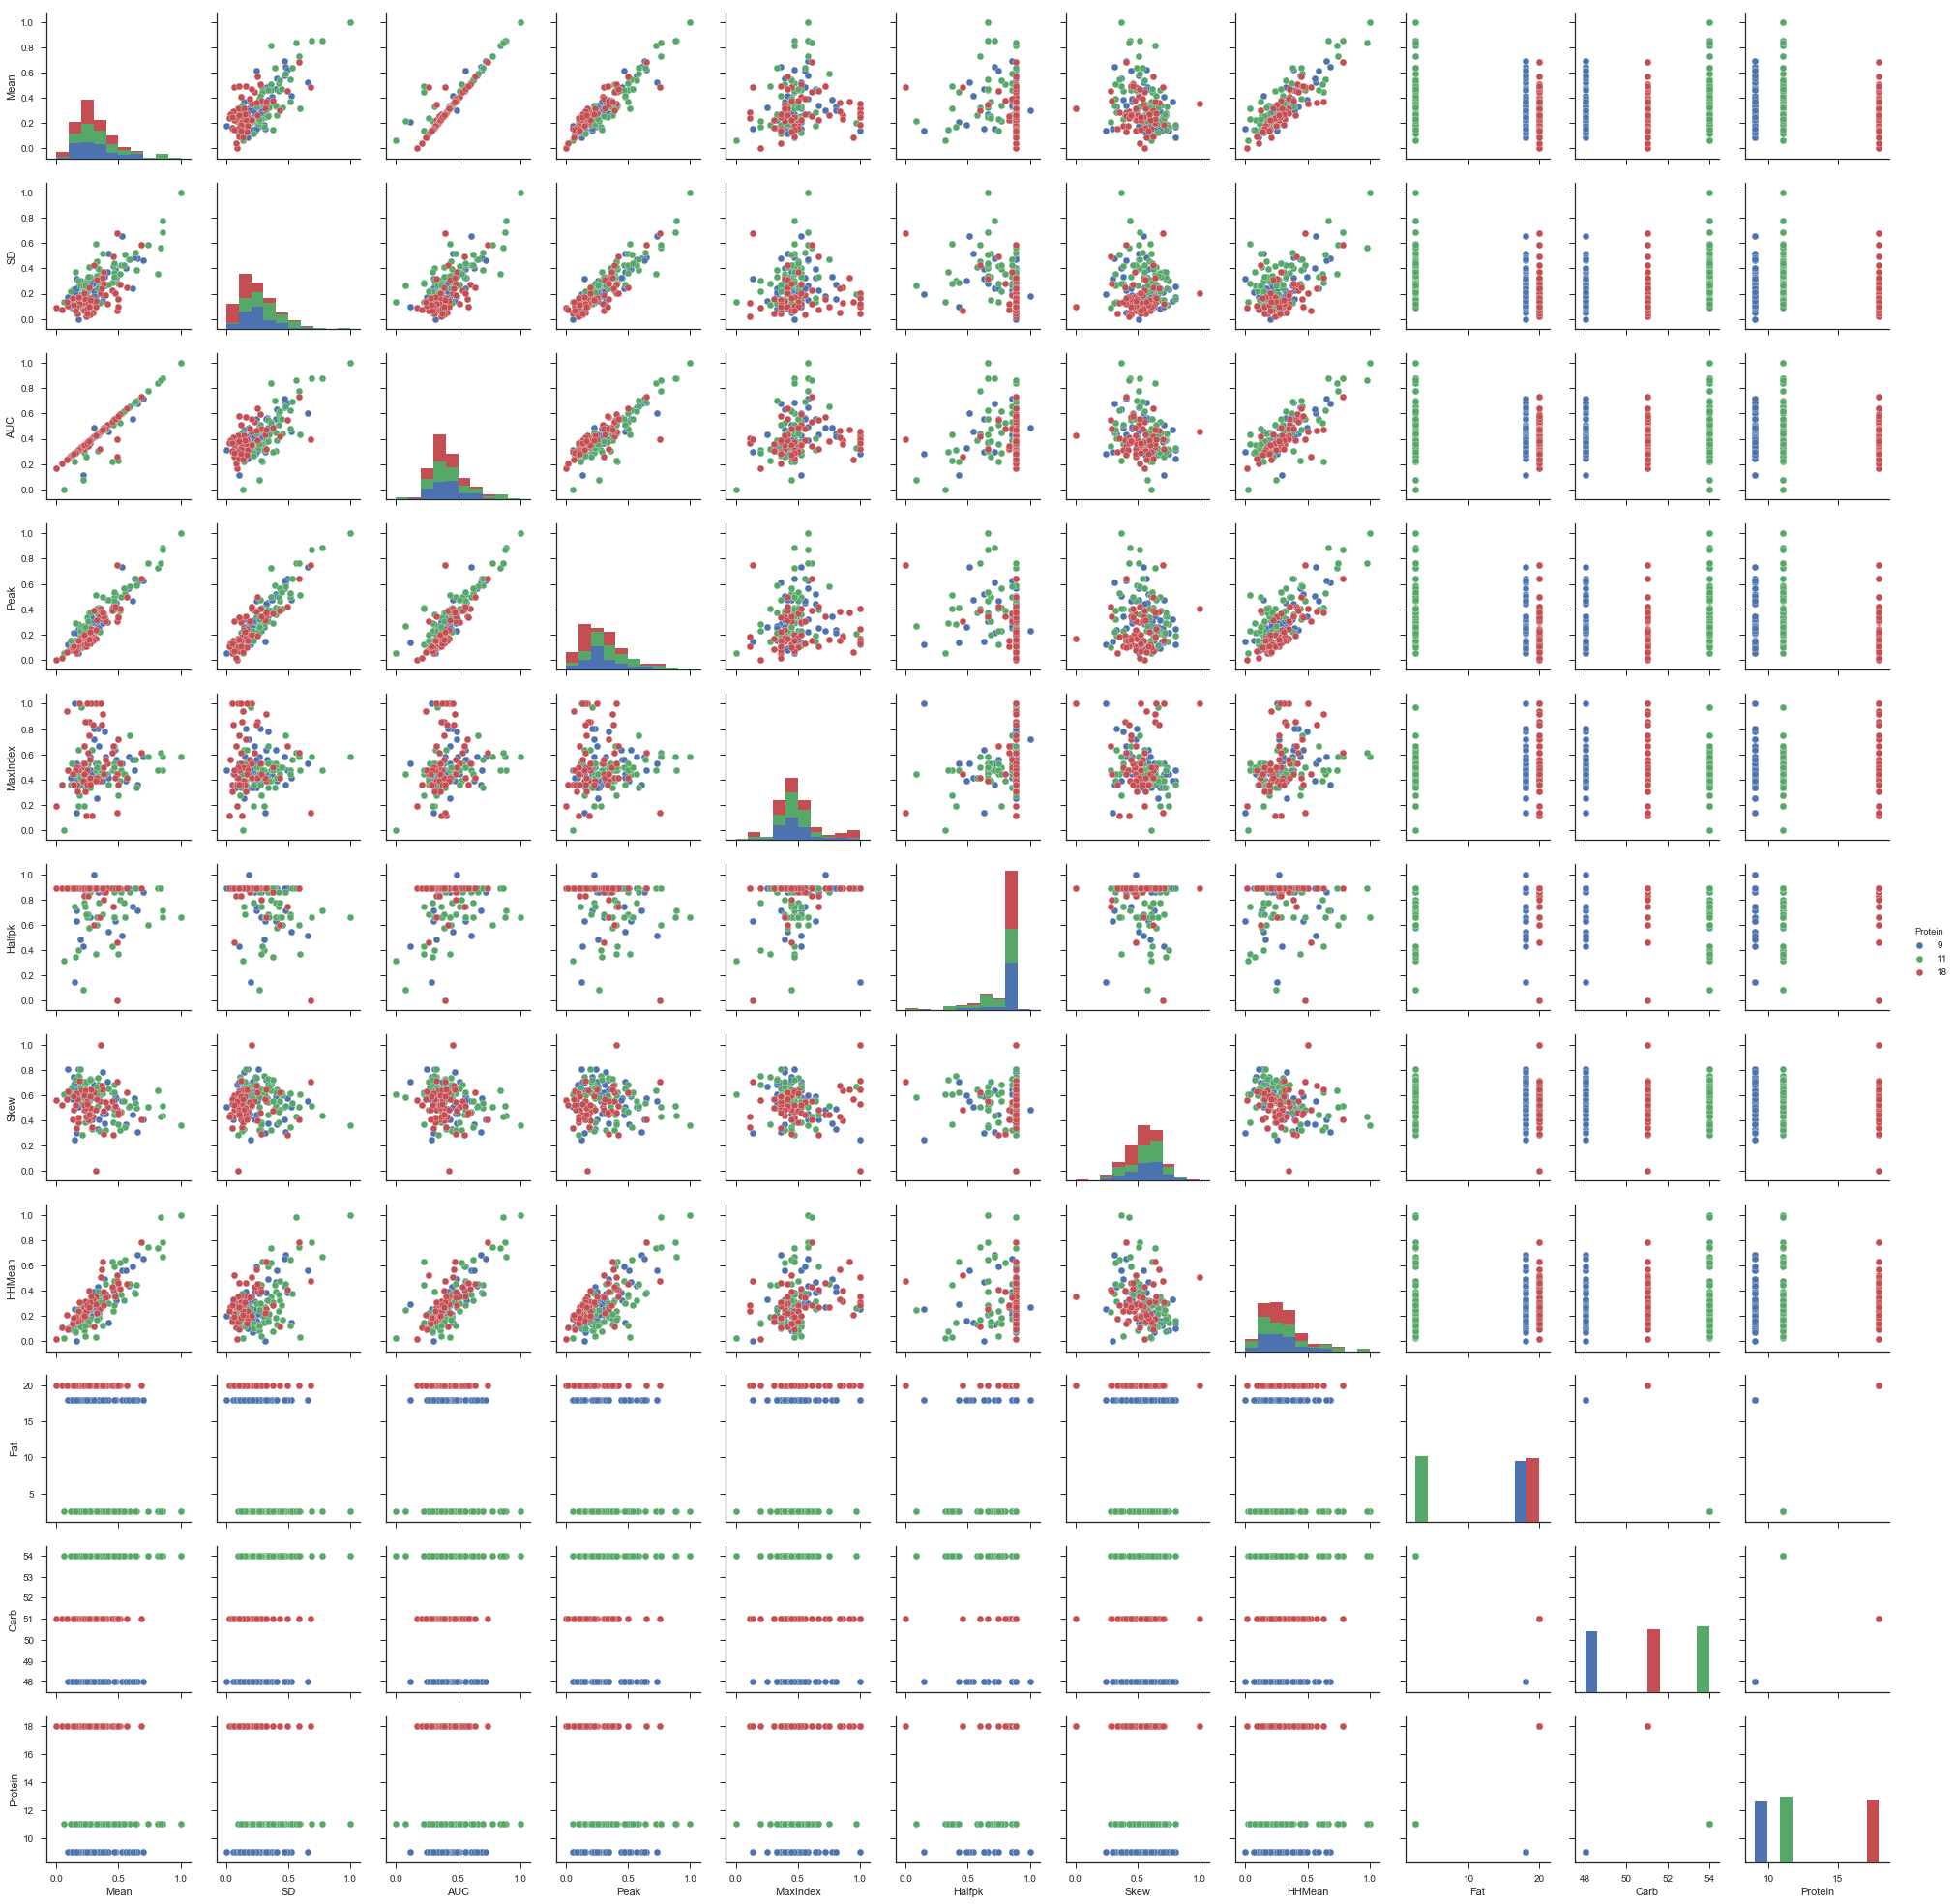

In [61]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(normdf,hue="Protein")